<a href="https://colab.research.google.com/github/munich-ml/MLPy2020/blob/master/recap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2020-05-19

## Progmming language popularity

- [TOIBE popularity index](https://www.tiobe.com/tiobe-index/) ratings based on search quantities of 25 engines (Google, Baidu,.. but also Wikipedia)
> 1. C
> 1. Java
> 1. **Python** 
- [PYPL](http://pypl.github.io/) measures how often language tutorials are googled by exploring Google Trends.
> 1. **Python** 
> 1. Java
> 1. JavaScript
- [GitHub statistics](https://madnight.github.io/githut/#/pull_requests/2020/1) percentage pull-requests / commits / issues on GitHub.
> 1. JavaScript
> 1. **Python** 
- [Stackoverflow survey 2019](https://insights.stackoverflow.com/survey/2019): Key result #1: *Python, the fastest-growing major programming language, has risen in the ranks of programming languages in our survey yet again, edging out Java this year and standing as the second most loved language (behind Rust).*
> 1. JavaScript
> 1. HTML/CSS
> 1. SQL
> 1. **Python** 

## `str.format()` issue

`str` concatanation within `print()`:

In [0]:
line = "header"
lineNo = 2
print("'" + line + "' found in line no. " + str(lineNo) + "!") 

Formatted string using `format()`

In [0]:
print("'{}' found in line no. {}!".format(line, lineNo))

**Format specifiers** may be added

In [0]:
print("'{}' found in line no. {:.1f}!".format(line, lineNo))

Placeholders can be **blank `{}`** for automatic, **positional `{0}`** for manual numbering or referenced by **keyword `{keyword}`**: 

In [0]:
print("'{0}' found in line no. {1:.0%}!".format(line, lineNo))

However, switching form automatic to manual numbering raises an exception:

In [0]:
print("'{}' found in line no. {1:.0%}!".format(line, lineNo))

**Further reading**: [format() tutorial](https://www.programiz.com/python-programming/methods/string/format)

### f string available from Python 3.6

In [0]:
print(f"'{line}' found in line no. {lineNo:.1f}!")

## scope issue

Bug in `string_to_float` function: `item` wasn't defined locally:

In [0]:
def string_to_float(s):
    print("item: " + str(item))

In [0]:
some_str = "12.3 Ohms"

In [0]:
string_to_float(some_str)

### Get local scope with `dir()`
Build-in function `dir()` returns the list of names in the current local scope. 

In [0]:
dir()

In [0]:
[v for v in dir() if not v.startswith("_")]

Redifine `string_to_float` to print the function's local scope:

In [0]:
def string_to_float(s):
    print("Local scope: " + str([v for v in dir() if not v.startswith("_")]))
    print("item: " + str(item))

In [0]:
string_to_float(some_str)

**Exception** because `item` doesn't exist in local or global scope.

No exception occurs, if `item` is defined in the global scope.

In [0]:
for item in ["4.67 mOhms", "1.23"]:
    string_to_float(item)

In [0]:
del item

### Static code analysis
The use of static code analysis (e.y. Pylint) is highly recommended. 

## `import` a module

In [0]:
np.pi

`np` must be defined first

In [0]:
import numpy as np

In [0]:
np.pi

Alternatively, import the functions that are specifically needed:

In [0]:
from numpy import pi, eye

In [0]:
pi

In [0]:
del pi, eye

In [0]:
dir(np)

In [0]:
dir()

**Antipattern:**

In [0]:
from numpy import *

In [0]:
pi

That worked, **BUT**...

In [0]:
dir()

Import statement like `from MODULE import *` should be avoided!

Detecting undefined names in the program becomes rather difficult. 

As a general best practice, import statements should be as specific as possible and should only import what they need.

## `12_Logfile_challenge.ipynb` recap

- `!git clone https://github.com/munich-ml/MLPy2020/` for getting `logfile.csv`
- task: Parsing the logfile from `s`, `<type 'str'>`  
- `lines = s.split("\n")`
- `<type 'list'>` is iterable: `for line in lines:`
- `<type 'dict'>` for key-value lookup, like `idxs = {'header': 2, 'measurements': 8}`
- `<type 'set'>` for set operations like `union`, `diff`
- 2-dim `data` became a list of lists: `data[row][col]`, that doesn't support matrix operations like element-wise multiplication or arbitrary indexing.


In [0]:
data = [[0.1, 43], [0.2, 58]]
data

# 2020-05-20

## `15_NumPy.ipynb` recap

**NumPy** is made for matrix math and very fast in that

`numpy.array`
- is the basic NumPy datatype
- may have 1, 2 or N dimensions
- all items have the same datatype
- provide arbitrary indexing
- provide element-wise operations

NumPy provides various *concatanation methods*
- `np.column_stack()` supports horizontal stacking of 2D and 1D arrays


In [7]:
import numpy as np
np.column_stack(([[0.1, 5], [0.2, 7]],
                 [3.3, 4.4]))

array([[0.1, 5. , 3.3],
       [0.2, 7. , 4.4]])

## `16_Matplotlib.ipynb` recap

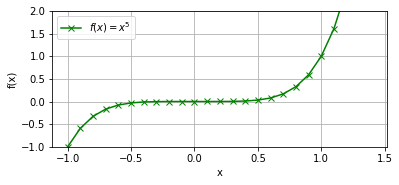

In [34]:
import matplotlib.pyplot as plt

exp = 5
x = np.arange(-1, 1.5, 0.1)
y = np.power(x, exp)

plt.figure(figsize=([6, 2.5]))
plt.plot(x, y, color="g", marker="x", label="$f(x)=x^{}$".format(exp))
plt.ylim([-1, 2])
plt.xlabel("x"), plt.ylabel("f(x)")
plt.grid()
plt.legend();

For more inspiration go to [Matplotlib website](https://matplotlib.org/)

`%matplotlib` magic switches between:
- static inline plots (default) with `%matplotlib inline`
- interactive plots with `%matplotlib qt`

## `17_Pandas.ipynb` recap

**Pandas** (alias `pd`) is a Python package providing fast, flexible, and expressive data
structures designed to make working with "labeled" data both
easy and intuitive. 

**`pd.DataFrame`** is a two-dimensional data structure with labeled axes, rows (`index`) and `column`. The data is often a `np.array`.

**`pd.Series`** is the one-dimensional version of the `pd.DataFrame`.

In [0]:
import pandas as pd

In [41]:
data = [[22, 104], [48, 223], [31, 130]]
cols = ["temperature [°C]", "current [mA]"]
rows = ["before", "during", "after"]

df = pd.DataFrame(data, columns=cols, index=rows)
df

,temperature [°C],current [mA]
before,22,104
during,48,223
after,31,130


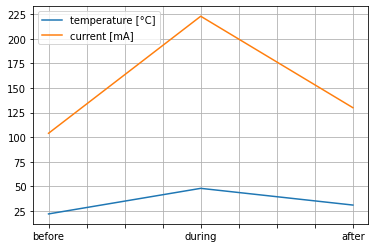

In [46]:
df.plot(grid=True);

# 2020-05-22

- Review [`18_Logfiles_w_classes.ipynb`](https://colab.research.google.com/github/munich-ml/MLPy2020/blob/master/18_Logfiles_w_classes.ipynb) in Colab